In [1]:
import pandas as pd
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import requests
from io import BytesIO
import numpy as np
import seaborn as sns
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
response = requests.get(url)
zip_file = zipfile.ZipFile(BytesIO(response.content))

# Extract the CSV file from the ZIP
csv_file = zip_file.open('bank-additional/bank-additional-full.csv')
df = pd.read_csv(csv_file, sep=';')

In [3]:
# Step 2: Explore the dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
categorical_features = df.select_dtypes(include=['object']).columns 
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [9]:
labelencoder=LabelEncoder()

df['marital']=labelencoder.fit_transform(df['marital'])
df['housing']=labelencoder.fit_transform(df['housing'])
df['y']=labelencoder.fit_transform(df['y'])
df['job']=labelencoder.fit_transform(df['job'])
df['month']=labelencoder.fit_transform(df['month'])
df['day_of_week']=labelencoder.fit_transform(df['day_of_week'])
df['education']=labelencoder.fit_transform(df['education'])
df['default']=labelencoder.fit_transform(df['default'])
df['loan']=labelencoder.fit_transform(df['loan'])
df['contact']=labelencoder.fit_transform(df['contact'])
df['poutcome']=labelencoder.fit_transform(df['poutcome'])



In [10]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
y=df['y']
X=df.drop('y',axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
Classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
Classifier.fit(X_train,y_train)
y_pred=Classifier.predict(X_test)
Classifier.score(X_test,y_test)

0.8894149065307113

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8894149065307113


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7303
           1       0.51      0.54      0.52       935

    accuracy                           0.89      8238
   macro avg       0.73      0.74      0.73      8238
weighted avg       0.89      0.89      0.89      8238



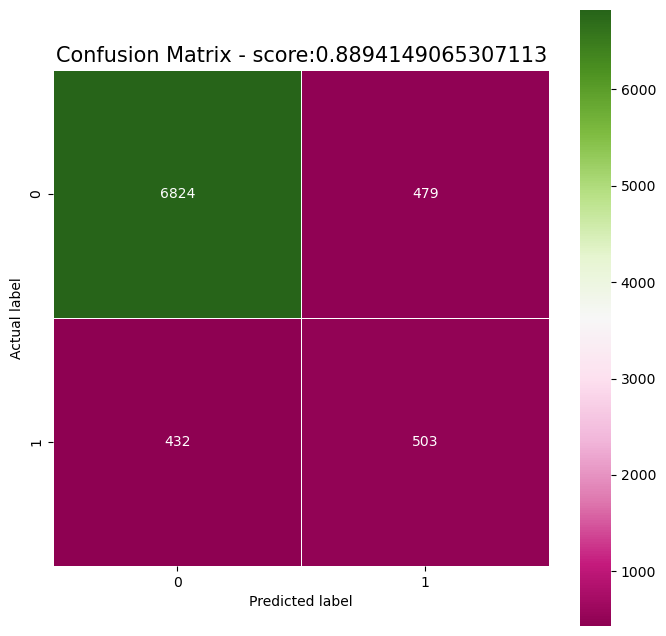

In [17]:
cm=confusion_matrix(y_test,y_pred)

plt.figure (figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='PiYG');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title,size=15);
plt.show()

In [18]:
column_names=X.columns
X_train_df=pd.DataFrame(X_train,columns=column_names)
X_train_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12556,40,1,1,2,1,2,0,1,3,1,94,2,999,0,1,1.4,93.918,-42.7,4.960,5228.1
35451,31,0,1,6,0,0,0,0,6,1,116,4,999,0,1,-1.8,92.893,-46.2,1.244,5099.1
30592,59,5,1,0,0,0,0,0,6,1,13,6,999,1,0,-1.8,92.893,-46.2,1.354,5099.1
17914,43,3,0,2,0,2,0,0,3,3,94,5,999,0,1,1.4,93.918,-42.7,4.961,5228.1
3315,39,0,2,3,1,0,0,1,6,2,344,2,999,0,1,1.1,93.994,-36.4,4.860,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58,5,1,5,1,0,0,1,6,3,427,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0
11284,37,4,1,6,0,0,0,1,4,2,288,1,999,0,1,1.4,94.465,-41.8,4.961,5228.1
38158,35,0,1,3,0,2,0,0,8,2,194,1,4,1,2,-3.4,92.431,-26.9,0.754,5017.5
860,40,4,1,6,0,2,0,1,6,4,295,2,999,0,1,1.1,93.994,-36.4,4.856,5191.0


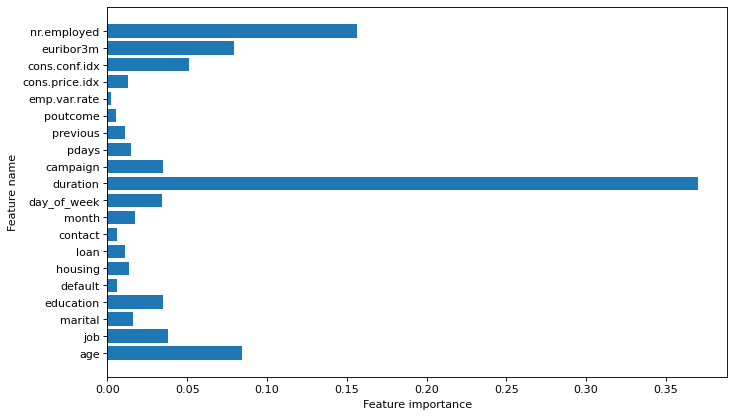

In [19]:
plt.figure(figsize=(10,6), dpi=80)
c_features = len(X_train_df.columns)
plt.barh(range(c_features), Classifier.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train_df.columns)
plt.show()


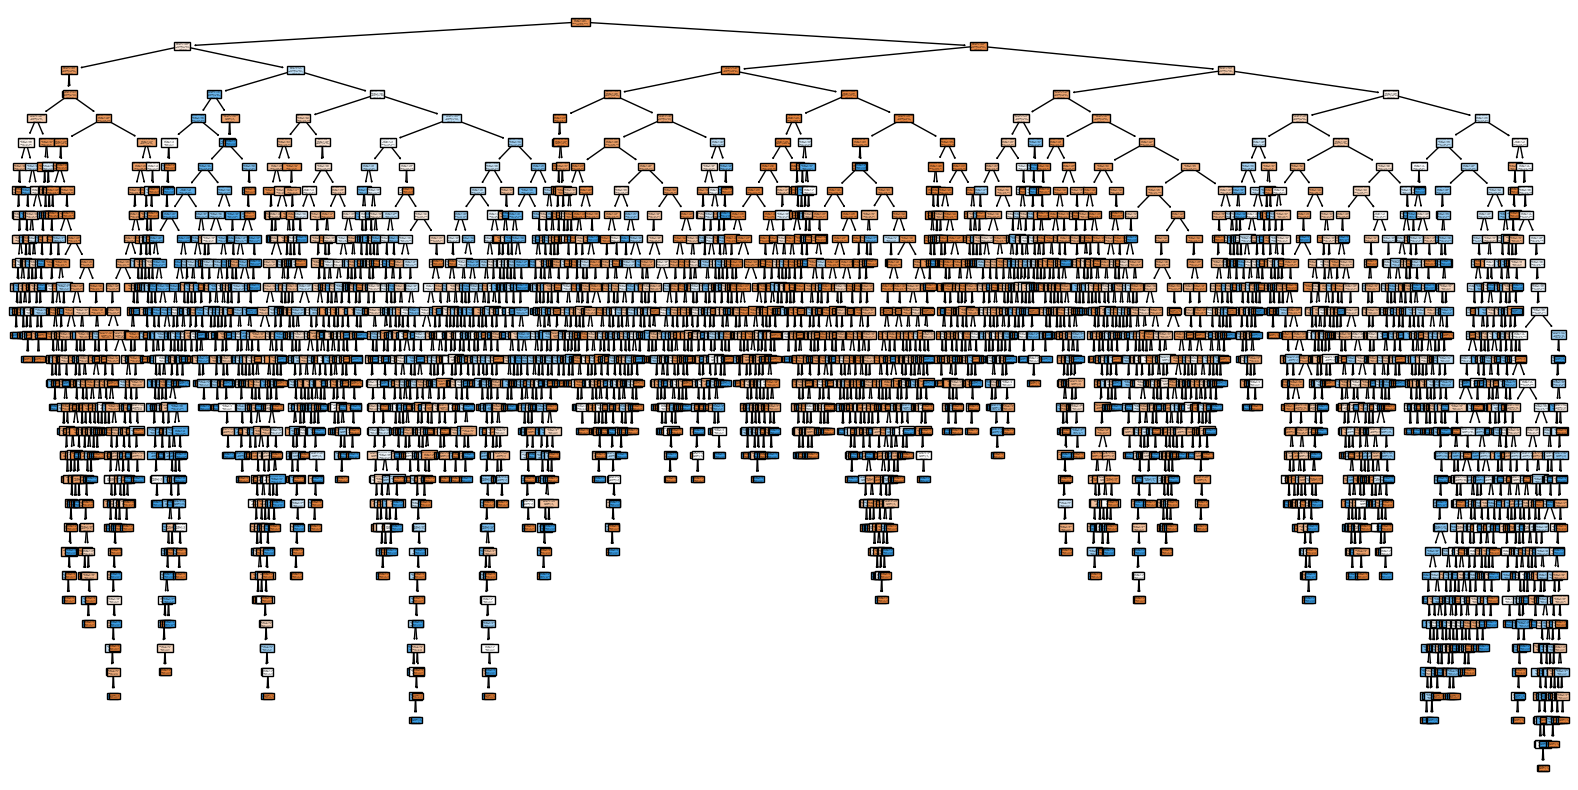

In [33]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(Classifier, filled=True, feature_names=X_train.columns, class_names=['No', 'Yes'])
plt.show()